In [91]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [92]:
x = pd.read_csv('40_x.csv',header=None)

In [93]:
 y = pd.read_csv('40_y.csv',header=None)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Column number 0
[[25.04847161]]


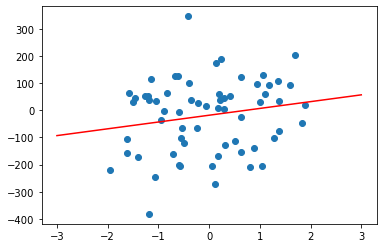

Column number 1
[[70.6383831]]


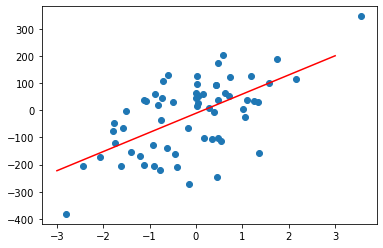

Column number 2
[[89.57210698]]


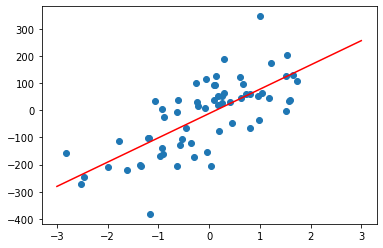

Column number 3
[[20.38881214]]


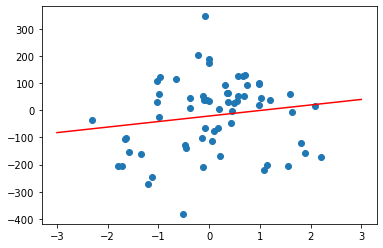

In [95]:
for i in x.columns:
    print(f'Column number {i}')
    model = LinearRegression()
    model.fit(X_train[i].to_numpy().reshape(-1,1),y_train)
    print(model.coef_)
    X0 = np.linspace(-3, 3, 100).reshape(-1,1)
    Y0 = model.predict(X0)
    plt.figure()
    plt.scatter(X_train[i], y_train)
    plt.plot(X0, Y0, 'r')
    plt.show()

In [96]:
#На самом деле по коэффициентам на мой взгляд нельзя прямо судить о силе связи.. 
#В некоторых случаях она может быть не совсем линейной 
#или ее может вообще не быть, но коэффициент буджет высоким из-за большой дисперсии
#а так для второй колонки сила связи наиболее высокая в данном случае

In [97]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
model = LinearRegression()
model.fit(X_train,y_train)
print('on Test')
print('r2')
print(r2_score(model.predict(X_test),y_test))
print('mean_squared_error')
print(mean_squared_error(model.predict(X_test),y_test))
print('mean_absolute_error')
print(mean_absolute_error(model.predict(X_test),y_test))
print('\n\non train')
print('r2')
print(r2_score(model.predict(X_train),y_train))
print('mean_squared_error')
print(mean_squared_error(model.predict(X_train),y_train))
print('mean_absolute_error')
print(mean_absolute_error(model.predict(X_train),y_train))

on Test
r2
0.9975890673973662
mean_squared_error
74.42056438547655
mean_absolute_error
7.686409953253999


on train
r2
0.994562290414256
mean_squared_error
97.15909866503313
mean_absolute_error
7.630893871689201


In [ ]:
#хорошо получилось

In [100]:
from sklearn.preprocessing import PolynomialFeatures
r2s_test,r2s_train,mse_test,mse_train,mae_test,mae_train = [],[],[],[],[],[]
for degree in [1,2,3,10]:
    print(f'degree {degree}')
    poly = PolynomialFeatures(degree)
    x_transformed = poly.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    print('on Test')
    print('r2')
    print(r2_score(model.predict(X_test),y_test))
    r2s_test.append(r2_score(model.predict(X_test),y_test))
    print('mean_squared_error')
    print(mean_squared_error(model.predict(X_test),y_test))
    mse_test.append(mean_squared_error(model.predict(X_test),y_test))
    print('mean_absolute_error')
    print(mean_absolute_error(model.predict(X_test),y_test))
    mae_test.append(mean_absolute_error(model.predict(X_test),y_test))
    print('on train')
    print('r2')
    print(r2_score(model.predict(X_train),y_train))
    r2s_train.append(r2_score(model.predict(X_train),y_train))
    print('mean_squared_error')
    print(mean_squared_error(model.predict(X_train),y_train))
    mse_train.append(mean_squared_error(model.predict(X_train),y_train))
    print('mean_absolute_error')
    print(mean_absolute_error(model.predict(X_train),y_train))
    mae_train.append(mean_absolute_error(model.predict(X_train),y_train))
    print('\n\n')

degree 1
on Test
r2
0.9975890673973662
mean_squared_error
74.42056438547617
mean_absolute_error
7.686409953253984
on train
r2
0.9945622904142559
mean_squared_error
97.15909866503314
mean_absolute_error
7.6308938716891825



degree 2
on Test
r2
0.9969074867210903
mean_squared_error
94.87350031875528
mean_absolute_error
7.690691410124604
on train
r2
0.9957082612535781
mean_squared_error
76.77079260877223
mean_absolute_error
6.66270086885228



degree 3
on Test
r2
0.9745417404213482
mean_squared_error
698.2536395162023
mean_absolute_error
19.77238337660276
on train
r2
0.9971121452684675
mean_squared_error
52.06262518536331
mean_absolute_error
5.698911804705903



degree 10
on Test
r2
-0.10246549098565083
mean_squared_error
160282715.4085684
mean_absolute_error
4155.022841255738
on train
r2
1.0
mean_squared_error
5.630877998373423e-20
mean_absolute_error
1.2623257994448522e-10





In [ ]:
# с 10 степенями регрессия явно незначимая и очень сильно переобученная в остальных случаях кроме 1
# степени - просто переобученная

In [101]:
df = [r2s_test,r2s_train,mse_test,mse_train,mae_test,mae_train]

In [102]:
pd.DataFrame(df,index = ['r2s_test','r2s_train','mse_test','mse_train','mae_test','mae_train'],columns =\
            ['degree 1','degree 2', 'degree 3', 'degree 10'])

,degree 1,degree 2,degree 3,degree 10
r2s_test,0.997589,0.996907,0.974542,-1.024655e-01
r2s_train,0.994562,0.995708,0.997112,1.000000e+00
mse_test,74.420564,94.873500,698.253640,1.602827e+08
mse_train,97.159099,76.770793,52.062625,5.630878e-20
mae_test,7.686410,7.690691,19.772383,4.155023e+03
mae_train,7.630894,6.662701,5.698912,1.262326e-10


In [ ]:
# даже на второй степени модель начинает переобучаться 
# (повышается mse на тиестовой выборке и падает на трейне)

In [ ]:
# а с увеличением размера датасета - время обучения естественно увеличится, 
# но проверить не могу тк в папке big_data нет x